# PROBLEM STATEMENT

• DOMAIN: MACHINE TRANSLATION.

• CONTEXT:
Machine Translation is the automated translation of source material into another language without human intervention. The database comes
from ACL2014 Ninth workshop on Statistical Machine Translation. This workshop mainly focusses on language translation between European
language pairs. The idea behind the workshop is to provide the ability for two parties to communicate and exchange the ideas from different
countries.

• DATA DESCRIPTION:
The database is basically sentences in German/English of various events. Three datasets are obtained from Statistical Machine Translation
workshop. Either the dataset can be downloaded from the link or can be used from the shared files. Three datasets are,

• Europarl v7

• Common Crawl corpus

• News Commentary

Link to download the dataset: https://statmt.org/wmt14/translation-task.html

# • PROJECT OBJECTIVE

Design a Machine Translation model that can be used to translate sentences from German language to English language or vice-versa.

## • PROJECT TASK: [ Score: 100 points]

### 1. Milestone 1: [ Score: 40 points ]

 Input: Context and Dataset

‣ Process:

‣ Step 1: Import and merge all the three datasets. [ 5 points ]

‣ Step 2: Data cleansing [ 7 points ]

‣ Step 3: NLP pre processing - Dataset suitable to be used for AIML model learning [ 8 points ]

‣ Step 4: Design, train and test simple RNN & LSTM model [ 10 points ]

‣ Step 5: Interim report [ 10 points ]

### Step 1: Import and merge all the three datasets. [ 5 points ]



In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Input, TimeDistributed, Dense, Activation, RepeatVector, Embedding, Bidirectional, Dropout, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Model
from keras.layers import LSTM, Input, TimeDistributed, Dense, Activation, RepeatVector, Embedding, Bidirectional, Dropout
from keras.layers import SimpleRNN
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, RepeatVector, Dense
from tensorflow.keras.models import Sequential
from string import digits


nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
dir_path = "/content/drive/MyDrive/GL - NLP MT/data/"
common_crawl_de_file = "commoncrawl_de_en.txt"
common_crawl_en_file = "commoncrawl_en_de.txt"
europarl_de_file = "europarl-v7_de_en.txt"
europarl_en_file = "europarl-v7_en_de.txt"
news_commentary_de_file = "news-commentary-v9_de_en.txt"
news_commentary_en_file = "news-commentary-v9_en_de.txt"

In [4]:
common_crawl_de_df = pd.DataFrame(pd.Series(open(dir_path+common_crawl_de_file).read().splitlines()), columns=['german'])
common_crawl_en_df = pd.DataFrame(pd.Series(open(dir_path+common_crawl_en_file).read().splitlines()), columns=['english'])
europarl_de_df = pd.DataFrame(pd.Series(open(dir_path+europarl_de_file).read().splitlines()), columns=['german'])
europarl_en_df = pd.DataFrame(pd.Series(open(dir_path+europarl_en_file).read().splitlines()), columns=['english'])
news_commentary_de_df = pd.DataFrame(pd.Series(open(dir_path+news_commentary_de_file).read().splitlines()), columns=['german'])
news_commentary_en_df = pd.DataFrame(pd.Series(open(dir_path+news_commentary_en_file).read().splitlines()), columns=['english'])

In [5]:
print("common_crawl_de_df : length : ", len(common_crawl_de_df ))
print("common_crawl_en_df : length : ", len(common_crawl_en_df ))
print("europarl_de_df : length : ", len(europarl_de_df ))
print("europarl_en_df : length : ", len(europarl_en_df ))
print("news_commentary_de_df : length : ", len(news_commentary_de_df ))
print("news_commentary_en_df : length : ", len(news_commentary_en_df ))

common_crawl_de_df : length :  2399123
common_crawl_en_df : length :  2399123
europarl_de_df : length :  1920209
europarl_en_df : length :  1920209
news_commentary_de_df : length :  201854
news_commentary_en_df : length :  202002


In [6]:
news_commentary_en_df["english"].apply(lambda x: x.strip() == '').sum()

335

In [7]:
202002 - 335

201667

In [8]:
news_commentary_de_df["german"].apply(lambda x: x.strip() == '').sum()

234

In [9]:
201854 - 234

201620

In [10]:
news_commentary_de_df.tail()

,german
201849,Das bleibt eine der größten Errungenschaften i...
201850,Gleichzeitig scheint sich Zumas revolutionäre ...
201851,"In einer Region, wo die älteren Menschen sehr ..."
201852,Drei von zehn Südafrikanern sind jünger als 15...
201853,"Irgendwie muss Zuma einen Weg finden, einersei..."


In [11]:
news_commentary_en_df.tail()

,english
201997,Their achievement remains one of the greatest ...
201998,"At the same time, Zuma’s revolutionary generat..."
201999,"In a region that reveres the elderly, Zuma’s a..."
202000,Three in ten South Africans are younger than 1...
202001,Somehow Zuma must find a way to honor his own ...


In [12]:
# Since the News Commentary V9 dataset is unreliable, it is not taken into account. The index values for the English and German corpora don't match.

In [13]:
common_crawl_df = pd.concat([common_crawl_en_df, common_crawl_de_df], axis=1)
common_crawl_df.head()

,english,german
0,iron cement is a ready for use paste which is ...,"iron cement ist eine gebrauchs-fertige Paste, ..."
1,iron cement protects the ingot against the hot...,Nach der Aushärtung schützt iron cement die Ko...
2,"a fire restant repair cement for fire places, ...",feuerfester Reparaturkitt für Feuerungsanlagen...
3,Construction and repair of highways and...,Der Bau und die Reparatur der Autostraßen...
4,An announcement must be commercial character.,die Mitteilungen sollen den geschäftlichen kom...


In [14]:
europarl_df = pd.concat([europarl_en_df, europarl_de_df], axis=1)
europarl_df.head()

,english,german
0,Resumption of the session,Wiederaufnahme der Sitzungsperiode
1,I declare resumed the session of the European ...,"Ich erkläre die am Freitag, dem 17. Dezember u..."
2,"Although, as you will have seen, the dreaded '...","Wie Sie feststellen konnten, ist der gefürchte..."
3,You have requested a debate on this subject in...,Im Parlament besteht der Wunsch nach einer Aus...
4,"In the meantime, I should like to observe a mi...",Heute möchte ich Sie bitten - das ist auch der...


In [15]:
print(len(common_crawl_df))
print(len(europarl_df))

2399123
1920209


In [16]:
merged_df = pd.concat([common_crawl_df, europarl_df], axis=0)
len(merged_df)

4319332

In [17]:
merged_df['english_len'] = merged_df['english'].str.split().apply(len)
merged_df['german_len'] = merged_df['german'].str.split().apply(len)

In [18]:
merged_df.head()

,english,german,english_len,german_len
0,iron cement is a ready for use paste which is ...,"iron cement ist eine gebrauchs-fertige Paste, ...",29,24
1,iron cement protects the ingot against the hot...,Nach der Aushärtung schützt iron cement die Ko...,12,14
2,"a fire restant repair cement for fire places, ...",feuerfester Reparaturkitt für Feuerungsanlagen...,12,8
3,Construction and repair of highways and...,Der Bau und die Reparatur der Autostraßen...,6,7
4,An announcement must be commercial character.,die Mitteilungen sollen den geschäftlichen kom...,6,8


In [19]:
merged_df = merged_df[(merged_df['english_len'] <= 30) & (merged_df['german_len'] > 0)
                                  & (merged_df['german_len'] <= 30 )& (merged_df['german_len'] > 0)]

In [20]:
new_df = merged_df.sample(n=30000)

In [21]:
!pip install langdetect
from langdetect import detect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=bcbcdb3a42d12080dc0cee696435e23ae37cce2aedbc43c444cc2b1750af6db6
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [22]:
# Detect language of sentence
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = 'Unknown'
    return lang

In [23]:
new_df['english_lang'] = new_df['english'].apply(detect_language)
new_df['german_lang'] = new_df['german'].apply(detect_language)

In [24]:
new_df.head()

,english,german,english_len,german_len,english_lang,german_lang
819260,Could not simply go from my floor to their flo...,Für längeren Aufenthalt mit mehr Garderobe wir...,12,9,en,de
1520066,Columbus Palace Hotel is a 37 room hotel locat...,"This is a ST class hotel centrally located, su...",13,15,en,en
1263542,While it might appear to be a statistical erro...,"Was wie ein statistischer Fehler anmutet, zeig...",25,22,en,de
2253907,A meta description with 139 chars found in the...,Eine Meta Beschreibung mit einer Länge von 139...,11,11,en,de
1131211,Amendment 20 foresees that the installation of...,Mit Änderungsantrag 20 ist der Einbau von VMS-...,23,21,en,de


In [25]:
new_df_final = new_df[(new_df['german_lang']=='de') & (new_df['english_lang']=='en')]

In [26]:
len(new_df_final)

28278

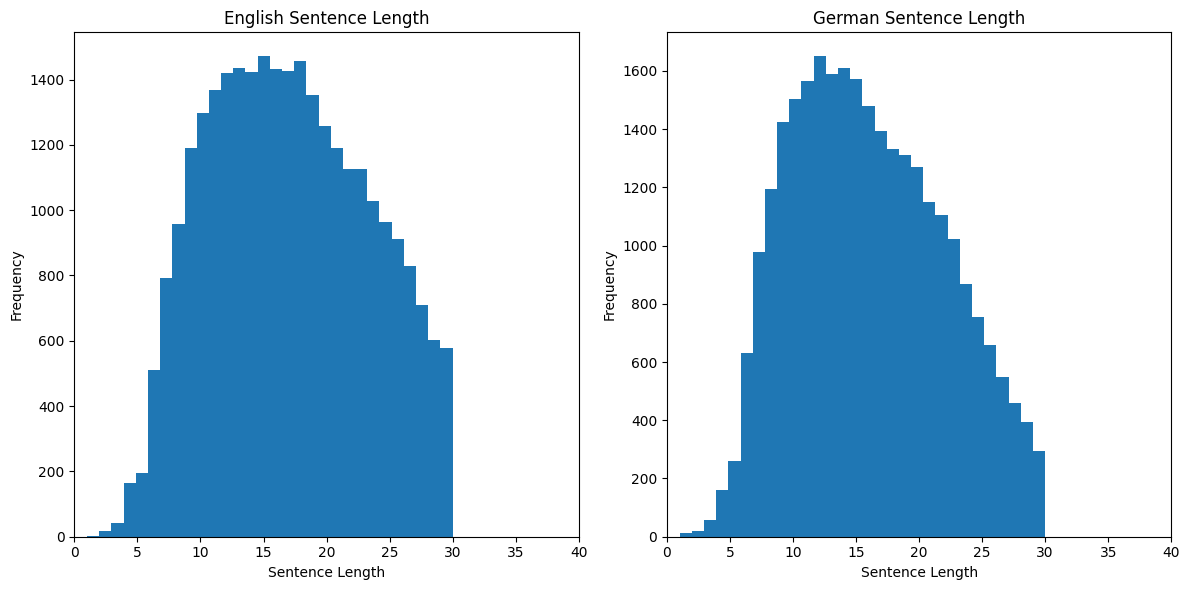

In [27]:
import matplotlib.pyplot as plt

%matplotlib inline

# basic EDA to check the pattern

eng_l = []
ger_l = []

# populate the lists with sentence lengths
for i in new_df_final['english']:
    eng_l.append(len(i.split()))

for i in new_df_final['german']:
    ger_l.append(len(i.split()))

# Create a new DataFrame with the sentence lengths
length_df = pd.DataFrame({'eng': eng_l, 'ger': ger_l})

# Create subplots for each column in length_df
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for 'eng' column
axs[0].hist(length_df['eng'], bins=30)
axs[0].set_title('English Sentence Length')
axs[0].set_xlabel('Sentence Length')
axs[0].set_ylabel('Frequency')
axs[0].set_xlim(0, 40)  # Set x-axis limit to 100

# Plot histogram for 'deu' column
axs[1].hist(length_df['ger'], bins=30)
axs[1].set_title('German Sentence Length')
axs[1].set_xlabel('Sentence Length')
axs[1].set_ylabel('Frequency')
axs[1].set_xlim(0, 40)  # Set x-axis limit to 100

plt.tight_layout()
plt.show()

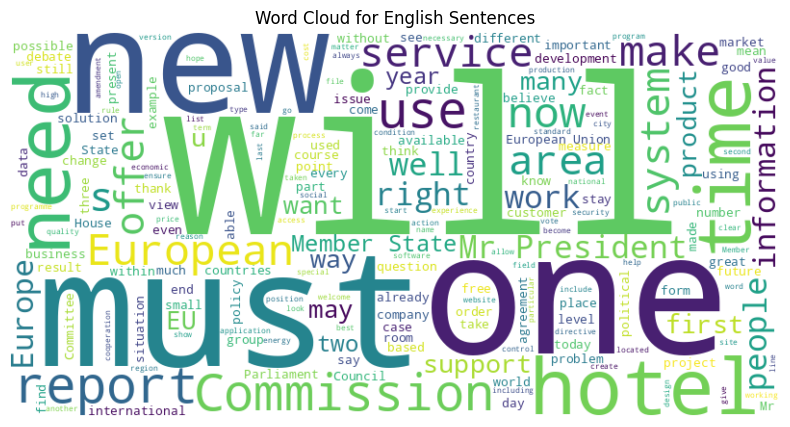

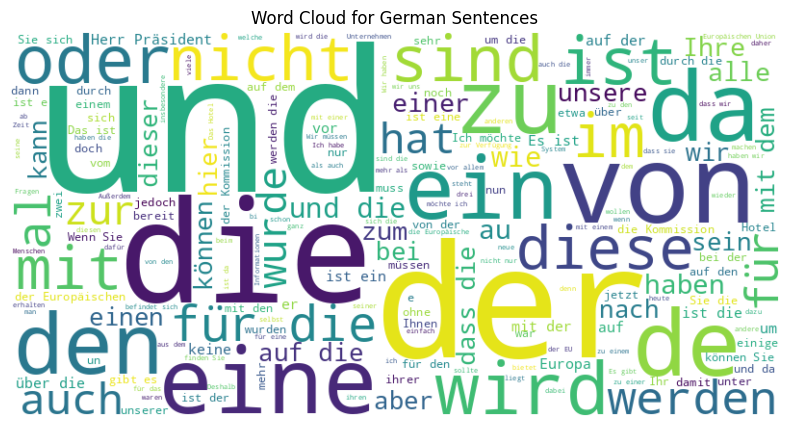

In [28]:
import pandas as pd

import matplotlib.pyplot as plt

from wordcloud import WordCloud


text_column1 = " ".join(new_df_final['english'].values.astype(str))

wordcloud_column1 = WordCloud(width=800, height=400, background_color='white').generate(text_column1)

text_column2 = " ".join(new_df_final['german'].values.astype(str))

wordcloud_column2 = WordCloud(width=800, height=400, background_color='white').generate(text_column2)

plt.figure(figsize=(10, 5))

plt.imshow(wordcloud_column1, interpolation='bilinear')

plt.title('Word Cloud for English Sentences')

plt.axis('off')

plt.show()

plt.figure(figsize=(10, 5))

plt.imshow(wordcloud_column2, interpolation='bilinear')

plt.title('Word Cloud for German Sentences')

plt.axis('off')

plt.show()

### Step 2: Data cleansing [ 7 points ]

In [29]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.strip()
    text = re.sub(r'[" "]+', " ", text)
    return text

def clean_dataframe(df):
    df["english"] = df["english"].apply(clean_text)
    df["german"] = df["german"].apply(clean_text)
    return df

In [30]:
clean_df = clean_dataframe(new_df_final)

<ipython-input-29-1ef3624e3257>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["english"] = df["english"].apply(clean_text)
<ipython-input-29-1ef3624e3257>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["german"] = df["german"].apply(clean_text)


In [31]:
clean_df[0:5]

,english,german,english_len,german_len,english_lang,german_lang
819260,could not simply go from my floor to their flo...,fr lngeren aufenthalt mit mehr garderobe wird ...,12,9,en,de
1263542,while it might appear to be a statistical erro...,was wie ein statistischer fehler anmutet zeigt...,25,22,en,de
2253907,a meta description with chars found in the met...,eine meta beschreibung mit einer lnge von zeic...,11,11,en,de
1131211,amendment foresees that the installation of vm...,mit nderungsantrag ist der einbau von vmsgerte...,23,21,en,de
2282675,we the newropeans are a completely different t...,wir die newropeans sind eine vllig neue art vo...,30,25,en,de


In [32]:
clean_df.head()

,english,german,english_len,german_len,english_lang,german_lang
819260,could not simply go from my floor to their flo...,fr lngeren aufenthalt mit mehr garderobe wird ...,12,9,en,de
1263542,while it might appear to be a statistical erro...,was wie ein statistischer fehler anmutet zeigt...,25,22,en,de
2253907,a meta description with chars found in the met...,eine meta beschreibung mit einer lnge von zeic...,11,11,en,de
1131211,amendment foresees that the installation of vm...,mit nderungsantrag ist der einbau von vmsgerte...,23,21,en,de
2282675,we the newropeans are a completely different t...,wir die newropeans sind eine vllig neue art vo...,30,25,en,de


### Step 3: NLP pre processing - Dataset suitable to be used for AIML model learning

In [33]:
def tokenize(lines):
    tokenizer = Tokenizer(filters='"#$%&()*+,-/:;<=>@[\\]^_`{|}~\t\n', lower=False)
    tokenizer.fit_on_texts(lines)
    return tokenizer

def max_length(sentences):
    lengths = [len(s.split()) for s in sentences]
    return max(lengths)

def nlp_preprocessing(sentences):
    tokens = tokenize(sentences)
    lang_max_length = max_length(sentences)
    seq=tokens.texts_to_sequences(sentences)
    seq=pad_sequences(seq, lang_max_length, padding='post')
    return tokens, seq, lang_max_length


def prepare_data(clean_df):
    eng_sentences = clean_df["english"].to_list()
    ger_sentences = clean_df["german"].to_list()
    tokens_eng, seq_eng, lang_max_length_eng = nlp_preprocessing(eng_sentences)
    tokens_ger, seq_ger, lang_max_length_ger = nlp_preprocessing(ger_sentences)
    return tokens_eng, seq_eng, lang_max_length_eng, tokens_ger, seq_ger, lang_max_length_ger

In [34]:
tokens_eng, seq_eng, lang_max_length_eng, tokens_ger, seq_ger, lang_max_length_ger = prepare_data(clean_df)

### Step 4: Design, train and test simple RNN & LSTM model [ 10 points ]

In [35]:
def split_train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    print("Shape of X_train:", X_train.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_test:", y_test.shape)
    return X_train, X_test, y_train, y_test

In [36]:
X_train, X_test, y_train, y_test = split_train_test(seq_eng, seq_ger)

Shape of X_train: (22622, 30)
Shape of y_train: (22622, 30)
Shape of X_test: (5656, 30)
Shape of y_test: (5656, 30)


In [37]:
X_train[0:5]

array([[    1,   662,     7,  3048,    70,  4902, 27273, 27274,  2265,
         6272,  1258,  4669,     3,  1842,  3116,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [13808,   320,   430,   886,   551,     2,     1,  3469,   155,
          151, 13808,  2326,    17,    28,  1199,     1,   309,   509,
          145,     2,    77,    13,  5968,     1,   618,   425,     0,
            0,     0,     0],
       [   11,    35,  3071,     9,     1,  7893,   398,  1024,    38,
         7894,    12,   373,     3,     9,     1,   455,     2,     1,
          165,  1957,    13,  1137,     4,  1112,     0,     0,     0,
            0,     0,     0],
       [   18,    43,   206,   101,     9,    37,     7,    72,     6,
          593,    68,   103,   761,     4,   960, 12901,     9,    13,
           21,  3749, 21811,     5,  2278,     0,     0,     0,     0,
            0,     0,     0],
       [   90,   287,    19,

In [38]:
y_train[0:5]

array([[   60,  1111,    57, 18821,  5737,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [18505,   196, 43299,  1439,     2,  7758,  1951,    53, 18505,
            5,  2981,    40,     7,     1,   939,   810,     2,   128,
          153,    26,     6,  5265,    17,  2535,  2278,     0,     0,
            0,     0,     0],
       [   13,  2565,  1020,    27,     1,  9048,   378,    88, 29154,
        15745,     3,    27,    78,     1,   624,     2,   255,  1562,
           11,  2923,  1010,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [   18,   356,    27,    16,  2374,    75,   171,   454,   176,
         5015,    23,    56,  2783, 34563, 34564,     5, 15301,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [   13,   312,    64,

In [39]:
def simple_LSTM_model(inp_tokens, targ_tokens, inp_length, targ_length):

    NoOfNeurons = 256
    LearningRate = 0.001

    inp_vocab_size = len(inp_tokens.word_index) + 1
    targ_vocab_size = len(targ_tokens.word_index) + 1

    model = Sequential()
    model.add(Embedding(inp_vocab_size, 100, input_length=inp_length, mask_zero=True))
    model.add(LSTM(NoOfNeurons))
    model.add(Dropout(0.2))
    model.add(RepeatVector(targ_length))
    model.add(LSTM(NoOfNeurons, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(targ_vocab_size, activation='softmax'))


    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics = ["accuracy"])

    print('\nModel Definition:')
    print(model.summary())

    return model


##### English To German LSTM

In [40]:
model = simple_LSTM_model(tokens_eng, tokens_ger, lang_max_length_eng, lang_max_length_ger)


Model Definition:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           3252300   
                                                                 
 lstm (LSTM)                 (None, 256)               365568    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 30, 256)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 30, 256)           525312    
                                                                 
 dropout_1 (Dropout)         (None, 30, 256)           0         
                                     

In [41]:
Patience = 4
Verbose = 1
Epochs = 30
BatchSize = 128
callback = EarlyStopping(monitor='val_loss', patience=Patience, verbose=Verbose)
f = model.fit(X_train,
            y_train.reshape(y_train.shape[0], y_train.shape[1],1),
            validation_data = (X_test, y_test.reshape(y_test.shape[0], y_test.shape[1],1)),
            epochs=Epochs,
            batch_size=BatchSize,
            callbacks=[callback])

Epoch 1/30
177/177 [==============================] - 78s 372ms/step - loss: 5.4523 - accuracy: 0.4742 - val_loss: 4.8671 - val_accuracy: 0.4797
Epoch 2/30
177/177 [==============================] - 51s 288ms/step - loss: 4.8329 - accuracy: 0.4769 - val_loss: 4.8728 - val_accuracy: 0.4795
Epoch 3/30
177/177 [==============================] - 49s 275ms/step - loss: 4.7095 - accuracy: 0.4765 - val_loss: 4.6283 - val_accuracy: 0.4797
Epoch 4/30
177/177 [==============================] - 47s 266ms/step - loss: 4.4429 - accuracy: 0.4787 - val_loss: 4.4742 - val_accuracy: 0.4870
Epoch 5/30
177/177 [==============================] - 48s 271ms/step - loss: 4.7283 - accuracy: 0.4843 - val_loss: 5.2479 - val_accuracy: 0.4885
Epoch 6/30
177/177 [==============================] - 48s 271ms/step - loss: 4.5860 - accuracy: 0.4880 - val_loss: 4.5618 - val_accuracy: 0.4894
Epoch 7/30
177/177 [==============================] - 47s 267ms/step - loss: 4.2763 - accuracy: 0.4901 - val_loss: 4.5135 - val_ac

##### German To English LSTM

In [42]:
X_train_2, X_test_2, y_train_2, y_test_2 = split_train_test(seq_ger, seq_eng)

Shape of X_train: (22622, 30)
Shape of y_train: (22622, 30)
Shape of X_test: (5656, 30)
Shape of y_test: (5656, 30)


In [43]:
model_2 = simple_LSTM_model(tokens_ger, tokens_eng, lang_max_length_ger, lang_max_length_eng)


Model Definition:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 100)           5664300   
                                                                 
 lstm_2 (LSTM)               (None, 256)               365568    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 repeat_vector_1 (RepeatVect  (None, 30, 256)          0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 30, 256)           525312    
                                                                 
 dropout_3 (Dropout)         (None, 30, 256)           0         
                                   

In [44]:
f = model_2.fit(X_train_2,
            y_train_2.reshape(y_train_2.shape[0], y_train_2.shape[1],1),
            validation_data = (X_test_2, y_test_2.reshape(y_test_2.shape[0], y_test_2.shape[1],1)),
            epochs=Epochs,
            batch_size=BatchSize,
            callbacks=[callback])

Epoch 1/30
177/177 [==============================] - 54s 273ms/step - loss: 5.2671 - accuracy: 0.4364 - val_loss: 4.7476 - val_accuracy: 0.4436
Epoch 2/30
177/177 [==============================] - 35s 198ms/step - loss: 4.7440 - accuracy: 0.4386 - val_loss: 4.7153 - val_accuracy: 0.4436
Epoch 3/30
177/177 [==============================] - 30s 167ms/step - loss: 4.6485 - accuracy: 0.4382 - val_loss: 4.5897 - val_accuracy: 0.4437
Epoch 4/30
177/177 [==============================] - 30s 169ms/step - loss: 4.5206 - accuracy: 0.4388 - val_loss: 4.4587 - val_accuracy: 0.4437
Epoch 5/30
177/177 [==============================] - 29s 164ms/step - loss: 4.3464 - accuracy: 0.4494 - val_loss: 4.3748 - val_accuracy: 0.4644
Epoch 6/30
177/177 [==============================] - 29s 162ms/step - loss: 4.2582 - accuracy: 0.4619 - val_loss: 4.3766 - val_accuracy: 0.4641
Epoch 7/30
177/177 [==============================] - 29s 161ms/step - loss: 4.2018 - accuracy: 0.4667 - val_loss: 4.3791 - val_ac

##### English to German RNN

In [45]:
def simple_RNN_model(inp_tokens, targ_tokens, inp_length, targ_length):

    NoOfNeurons = 256
    LearningRate = 0.001

    inp_vocab_size = len(inp_tokens.word_index) + 1
    targ_vocab_size = len(targ_tokens.word_index) + 1

    model = Sequential()
    model.add(Embedding(inp_vocab_size, 100, input_length=inp_length, mask_zero=True))
    model.add(SimpleRNN(NoOfNeurons))
    model.add(Dropout(0.2))
    model.add(RepeatVector(targ_length))
    model.add(SimpleRNN(NoOfNeurons, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(targ_vocab_size, activation='softmax'))

    rms = optimizers.RMSprop(lr=LearningRate)
    model.compile(optimizer=rms, loss='sparse_categorical_crossentropy', metrics=["accuracy"])

    print('\nModel Definition:')
    print(model.summary())

    return model


In [46]:
model_rnn = simple_LSTM_model(tokens_eng, tokens_ger, lang_max_length_eng, lang_max_length_ger)


Model Definition:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 100)           3252300   
                                                                 
 lstm_4 (LSTM)               (None, 256)               365568    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 repeat_vector_2 (RepeatVect  (None, 30, 256)          0         
 or)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 30, 256)           525312    
                                                                 
 dropout_5 (Dropout)         (None, 30, 256)           0         
                                   

In [47]:
f = model_rnn.fit(X_train,
            y_train.reshape(y_train.shape[0], y_train.shape[1],1),
            validation_data = (X_test, y_test.reshape(y_test.shape[0], y_test.shape[1],1)),
            epochs=Epochs,
            batch_size=BatchSize,
            callbacks=[callback])

Epoch 1/30
177/177 [==============================] - 68s 351ms/step - loss: 5.4466 - accuracy: 0.4743 - val_loss: 4.8754 - val_accuracy: 0.4797
Epoch 2/30
177/177 [==============================] - 51s 291ms/step - loss: 4.8487 - accuracy: 0.4769 - val_loss: 4.8899 - val_accuracy: 0.4795
Epoch 3/30
177/177 [==============================] - 49s 280ms/step - loss: 4.6880 - accuracy: 0.4756 - val_loss: 4.5880 - val_accuracy: 0.4785
Epoch 4/30
177/177 [==============================] - 48s 273ms/step - loss: 4.4223 - accuracy: 0.4782 - val_loss: 4.4899 - val_accuracy: 0.4854
Epoch 5/30
177/177 [==============================] - 48s 272ms/step - loss: 4.3340 - accuracy: 0.4868 - val_loss: 4.4826 - val_accuracy: 0.4909
Epoch 6/30
177/177 [==============================] - 48s 271ms/step - loss: 4.2838 - accuracy: 0.4894 - val_loss: 4.4799 - val_accuracy: 0.4904
Epoch 7/30
177/177 [==============================] - 48s 271ms/step - loss: 4.2340 - accuracy: 0.4908 - val_loss: 4.4897 - val_ac

##### German To English RNN

In [92]:
model_rnn_2 = simple_RNN_model(tokens_ger, tokens_eng, lang_max_length_ger, lang_max_length_eng)


Model Definition:
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 30, 100)           5664300   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 256)               91392     
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 repeat_vector_10 (RepeatVec  (None, 30, 256)          0         
 tor)                                                            
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 30, 256)           131328    
                                                                 
 dropout_21 (Dropout)        (None, 30, 256)           0         
                                  

In [49]:
f = model_rnn_2.fit(X_train_2,
            y_train_2.reshape(y_train_2.shape[0], y_train_2.shape[1],1),
            validation_data = (X_test_2, y_test_2.reshape(y_test_2.shape[0], y_test_2.shape[1],1)),
            epochs=Epochs,
            batch_size=BatchSize,
            callbacks=[callback])

Epoch 1/30
177/177 [==============================] - 49s 260ms/step - loss: 5.0754 - accuracy: 0.4363 - val_loss: 4.6320 - val_accuracy: 0.4485
Epoch 2/30
177/177 [==============================] - 35s 198ms/step - loss: 4.6513 - accuracy: 0.4410 - val_loss: 4.5766 - val_accuracy: 0.4518
Epoch 3/30
177/177 [==============================] - 33s 189ms/step - loss: 4.6069 - accuracy: 0.4391 - val_loss: 4.3703 - val_accuracy: 0.4518
Epoch 4/30
177/177 [==============================] - 34s 193ms/step - loss: 4.6357 - accuracy: 0.4451 - val_loss: 4.3935 - val_accuracy: 0.4619
Epoch 5/30
177/177 [==============================] - 33s 187ms/step - loss: 4.4318 - accuracy: 0.4539 - val_loss: 4.2746 - val_accuracy: 0.4641
Epoch 6/30
177/177 [==============================] - 32s 183ms/step - loss: 4.3079 - accuracy: 0.4589 - val_loss: 4.2250 - val_accuracy: 0.4654
Epoch 7/30
177/177 [==============================] - 32s 182ms/step - loss: 4.2529 - accuracy: 0.4605 - val_loss: 4.2703 - val_ac

#Milestone 2: [ Score: 60 points ]

## Input : Preprocessed output from Milestone-1

### Step 1: Design, train and test RNN & LSTM model with embeddings [ 7 points ]

In [50]:
def load_glove_embeddings(embeddings_path, word_index, embedding_dim=100):
    embeddings_index = {}
    with open(embeddings_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix


In [51]:
def glove_LSTM_model(inp_tokens, targ_tokens, inp_length, targ_length, glove_embeddings_path):

    NoOfNeurons = 256
    LearningRate = 0.001

    inp_vocab_size = len(inp_tokens.word_index) + 1
    targ_vocab_size = len(targ_tokens.word_index) + 1

    embedding_dim = 100  # Change this to match the GloVe embedding dimension

    embedding_matrix = load_glove_embeddings(glove_embeddings_path, inp_tokens.word_index)

    model = Sequential()
    model.add(Embedding(inp_vocab_size, embedding_dim, input_length=inp_length, weights=[embedding_matrix], trainable=False))
    model.add(LSTM(NoOfNeurons))
    model.add(Dropout(0.2))
    model.add(RepeatVector(targ_length))
    model.add(LSTM(NoOfNeurons, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(targ_vocab_size, activation='softmax'))

    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=["accuracy"])

    print('\nModel Definition:')
    print(model.summary())

    return model

In [52]:
def flip_word_index_dict(dict):
    flip_dict = {}
    for w in dict:
        flip_dict[dict[w]] = w
    return flip_dict

def predictions_to_word_indices(preds):
    predicted_word_index=np.arange(preds.shape[0]*preds.shape[1]).reshape(preds.shape[0],preds.shape[1])
    for i in range(0,preds.shape[0]):
        for j in range(0,preds.shape[1]):
            wi=0
            for k in range(0,preds.shape[2]):
                if preds[i][j][k] > preds[i][j][wi]:
                    wi=k
            predicted_word_index[i,j]=wi
    return predicted_word_index

def sequences_to_sentences(sequence, indexToWord):
    sequences=[]
    for i in range(0,sequence.shape[0]):
        sentence=''
        for ind in sequence[i]:
            if sentence == '':
                sentence=str(indexToWord[ind+1])
            else:
                sentence=sentence+' '+str(indexToWord[ind+1])
        sequences.append(sentence)
    return sequences

def predict_print_first_5(model, X_test, word_index):
    predictions = model.predict(X_test[0:5])

    index_to_word = flip_word_index_dict(word_index)

    predictions_WI = predictions_to_word_indices(predictions)

    predicted_sentences = sequences_to_sentences(predictions_WI, index_to_word)

    actual_sentences = sequences_to_sentences(X_test[0:5], index_to_word)

    print('\nActual Sentences:\n')
    for n in range(0,5):
        print(n, actual_sentences[n])

    print('\nTranslated Sentences:\n')
    for n in range(0,5):
        print(n, predicted_sentences[n])

In [53]:
def plot_history(history):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(train_accuracy) + 1)

    plt.figure(figsize=(10, 6))

    plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')

    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


##### English to German LSTM with Glove Embeddings

In [54]:
embeddings_path = "/content/drive/MyDrive/GL - NLP MT/data/glove.6B.100d.txt"
model_lstm_glove = glove_LSTM_model(tokens_eng, tokens_ger, lang_max_length_eng, lang_max_length_ger, embeddings_path)


Model Definition:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 30, 100)           3252300   
                                                                 
 lstm_6 (LSTM)               (None, 256)               365568    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 repeat_vector_4 (RepeatVect  (None, 30, 256)          0         
 or)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 30, 256)           525312    
                                                                 
 dropout_9 (Dropout)         (None, 30, 256)           0         
                                   

In [55]:
Patience = 4
Verbose = 1
Epochs = 30
BatchSize = 64
callback = EarlyStopping(monitor='val_loss', patience=Patience, verbose=Verbose)
model_lstm_glove_history = model_lstm_glove.fit(X_train,
            y_train.reshape(y_train.shape[0], y_train.shape[1],1),
            validation_data = (X_test, y_test.reshape(y_test.shape[0], y_test.shape[1],1)),
            epochs=Epochs,
            batch_size=BatchSize,
            callbacks=[callback])

Epoch 1/30
354/354 [==============================] - 61s 162ms/step - loss: 5.0749 - accuracy: 0.4755 - val_loss: 4.4910 - val_accuracy: 0.4797
Epoch 2/30
354/354 [==============================] - 57s 161ms/step - loss: 4.3897 - accuracy: 0.4847 - val_loss: 4.4118 - val_accuracy: 0.4899
Epoch 3/30
354/354 [==============================] - 57s 162ms/step - loss: 4.2968 - accuracy: 0.4885 - val_loss: 4.3927 - val_accuracy: 0.4914
Epoch 4/30
354/354 [==============================] - 57s 162ms/step - loss: 4.2535 - accuracy: 0.4889 - val_loss: 4.4010 - val_accuracy: 0.4917
Epoch 5/30
354/354 [==============================] - 57s 162ms/step - loss: 4.2187 - accuracy: 0.4893 - val_loss: 4.4072 - val_accuracy: 0.4923
Epoch 6/30
354/354 [==============================] - 58s 163ms/step - loss: 4.1814 - accuracy: 0.4900 - val_loss: 4.3970 - val_accuracy: 0.4928
Epoch 7/30
354/354 [==============================] - 58s 163ms/step - loss: 4.1340 - accuracy: 0.4906 - val_loss: 4.3849 - val_ac

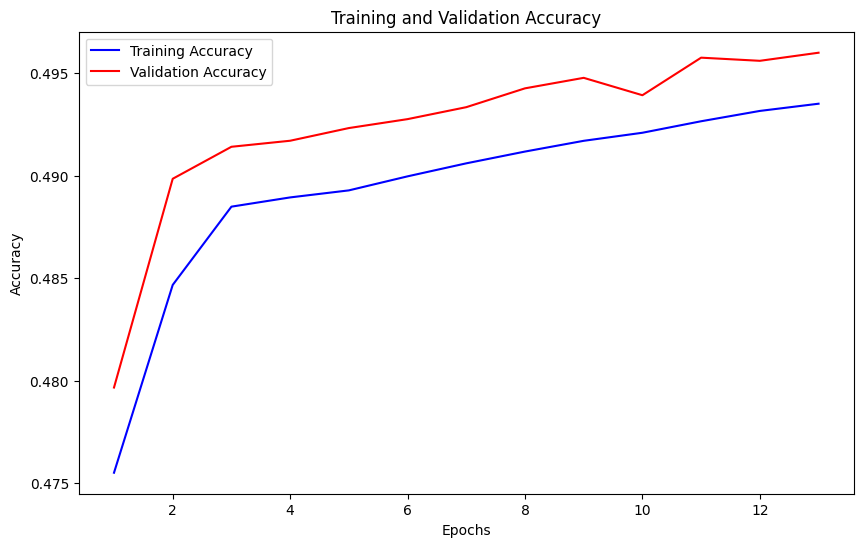

In [56]:
plot_history(model_lstm_glove_history)

In [57]:
predict_print_first_5(model_lstm_glove, X_test,tokens_ger.word_index)

1/1 [==============================] - 1s 723ms/step

Actual Sentences:

0 am service an der bei zwischen gab das fr kann ihrer absolute kenntnis die die die die die die die die die die die die die die die die die
1 ich an funktion der berarbeitet brauchen und scheitel auch der alter dank sind zollformalitten die die die die die die die die die die die die die die die die
2 c der warum in einer es meinem einfach mehr es des sie hnde sein zum und der kreativitt an benutzer der erzielt die die die die die die die die
3 ich an reduzieren ausgewogene von sie ursprngliche verbundenen alle sie wort gegenber die die die die die die die die die die die die die die die die die die
4 zustndig aus schlsselfaktor ist liegt sehen der qualittskontrolle es tisch ihnen der spiele und der schwarzer das dollar ort schriftlich berein die die die die die die die die die

Translated Sentences:

0 auf den auf der der der und und die die die die die die die die die die die die die die die die die die die die

##### German to English LSTM with Glove Embeddings

In [58]:
embeddings_path = "/content/drive/MyDrive/GL - NLP MT/data/glove.6B.100d.txt"
model_lstm_glove_ger_to_eng = glove_LSTM_model(tokens_ger, tokens_eng, lang_max_length_ger, lang_max_length_eng, embeddings_path)


Model Definition:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 30, 100)           5664300   
                                                                 
 lstm_8 (LSTM)               (None, 256)               365568    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 repeat_vector_5 (RepeatVect  (None, 30, 256)          0         
 or)                                                             
                                                                 
 lstm_9 (LSTM)               (None, 30, 256)           525312    
                                                                 
 dropout_11 (Dropout)        (None, 30, 256)           0         
                                   

In [59]:
model_lstm_glove_ger_to_eng_history = model_lstm_glove_ger_to_eng.fit(X_train_2,
            y_train.reshape(y_train_2.shape[0], y_train_2.shape[1],1),
            validation_data = (X_test_2, y_test_2.reshape(y_test_2.shape[0], y_test_2.shape[1],1)),
            epochs=Epochs,
            batch_size=BatchSize,
            callbacks=[callback])

Epoch 1/30
354/354 [==============================] - 35s 88ms/step - loss: nan - accuracy: 0.4755 - val_loss: nan - val_accuracy: 0.4437
Epoch 2/30
354/354 [==============================] - 31s 86ms/step - loss: nan - accuracy: 0.4770 - val_loss: nan - val_accuracy: 0.4437
Epoch 3/30
354/354 [==============================] - 31s 87ms/step - loss: nan - accuracy: 0.4770 - val_loss: nan - val_accuracy: 0.4437
Epoch 4/30
354/354 [==============================] - 31s 87ms/step - loss: nan - accuracy: 0.4770 - val_loss: nan - val_accuracy: 0.4437
Epoch 4: early stopping


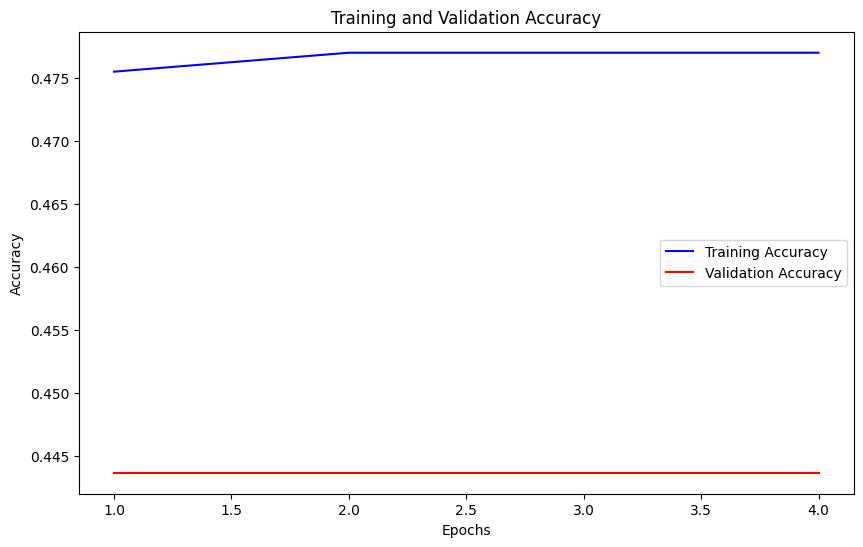

In [60]:
plot_history(model_lstm_glove_ger_to_eng_history)

In [61]:
predict_print_first_5(model_lstm_glove_ger_to_eng, X_test_2,tokens_ger.word_index)

1/1 [==============================] - 1s 701ms/step

Actual Sentences:

0 besonders handelt durch sie ihrer frau zu er hier vergessen kpfe idee ganze die die die die die die die die die die die die die die die die die
1 welche mm der partnerschaften httpwwwmicrosoftcomwindowsdirectx vielleicht ist und britischen tagesordnung erhhen hauptattraktionen die die die die die die die die die die die die die die die die die die
2 teams von der verfahren in muss und franzsische wird von automatisch geist von im allen um einer zuwanderung hier wird nach und ausbau sie dienstleitungen technische durch die die die
3 von zur aufnehmen httpopenbrezovajogosk den des offiziellen zu pltzlich das da behandelt vielen die die die die die die die die die die die die die die die die die
4 wahrsager ffentlich betrag irgendwoher wir finden geholfen teilte arbeitszeiten sie vollstndig bernimmt diese vor unserer kmpfen besteht ist begeben auch ja beitrgt die die die die die die die die

Translated Sentences:



#### English to German Birectional LSTM with Glove Embeddings

In [62]:
def glove_bidirectional_LSTM_model(inp_tokens, targ_tokens, inp_length, targ_length, glove_embeddings_path):

    NoOfNeurons = 256
    LearningRate = 0.001

    inp_vocab_size = len(inp_tokens.word_index) + 1
    targ_vocab_size = len(targ_tokens.word_index) + 1

    embedding_dim = 100  # Change this to match the GloVe embedding dimension

    embedding_matrix = load_glove_embeddings(glove_embeddings_path, inp_tokens.word_index)

    model = Sequential()
    model.add(Embedding(inp_vocab_size, embedding_dim, input_length=inp_length, weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(LSTM(NoOfNeurons)))
    model.add(Dropout(0.2))
    model.add(RepeatVector(targ_length))
    model.add(LSTM(NoOfNeurons, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(targ_vocab_size, activation='softmax'))

    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=["accuracy"])

    print('\nModel Definition:')
    print(model.summary())

    return model

In [63]:
def glove_bidirectional_GRU_model(inp_tokens, targ_tokens, inp_length, targ_length, glove_embeddings_path):

    NoOfNeurons = 256
    LearningRate = 0.001

    inp_vocab_size = len(inp_tokens.word_index) + 1
    targ_vocab_size = len(targ_tokens.word_index) + 1

    embedding_dim = 100  # Change this to match the GloVe embedding dimension

    embedding_matrix = load_glove_embeddings(glove_embeddings_path, inp_tokens.word_index)

    model = Sequential()
    model.add(Embedding(inp_vocab_size, embedding_dim, input_length=inp_length, weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(GRU(NoOfNeurons)))
    model.add(Dropout(0.2))
    model.add(RepeatVector(targ_length))
    model.add(GRU(NoOfNeurons, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(targ_vocab_size, activation='softmax'))

    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=["accuracy"])

    print('\nModel Definition:')
    print(model.summary())

    return model

In [64]:
model_bidirectional_lstm_glove = glove_bidirectional_LSTM_model(tokens_eng, tokens_ger, lang_max_length_eng, lang_max_length_ger, embeddings_path)


Model Definition:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 30, 100)           3252300   
                                                                 
 bidirectional (Bidirectiona  (None, 512)              731136    
 l)                                                              
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 repeat_vector_6 (RepeatVect  (None, 30, 512)          0         
 or)                                                             
                                                                 
 lstm_11 (LSTM)              (None, 30, 256)           787456    
                                                                 
 dropout_13 (Dropout)        (None,

In [65]:
Patience = 4
Verbose = 1
Epochs = 30
BatchSize = 4
callback = EarlyStopping(monitor='val_loss', patience=Patience, verbose=Verbose)
model_bidirectional_lstm_glove_history = model_bidirectional_lstm_glove.fit(X_train,
            y_train.reshape(y_train.shape[0], y_train.shape[1],1),
            validation_data = (X_test, y_test.reshape(y_test.shape[0], y_test.shape[1],1)),
            epochs=Epochs,
            batch_size=BatchSize,
            callbacks=[callback])

Epoch 1/30
5656/5656 [==============================] - 142s 24ms/step - loss: 4.5288 - accuracy: 0.4863 - val_loss: 4.3650 - val_accuracy: 0.4941
Epoch 2/30
5656/5656 [==============================] - 136s 24ms/step - loss: 4.2516 - accuracy: 0.4928 - val_loss: 4.2878 - val_accuracy: 0.4975
Epoch 3/30
5656/5656 [==============================] - 136s 24ms/step - loss: 4.1224 - accuracy: 0.4961 - val_loss: 4.2924 - val_accuracy: 0.5008
Epoch 4/30
5656/5656 [==============================] - 136s 24ms/step - loss: 4.0272 - accuracy: 0.4982 - val_loss: 4.2659 - val_accuracy: 0.5028
Epoch 5/30
5656/5656 [==============================] - 136s 24ms/step - loss: 3.9482 - accuracy: 0.5006 - val_loss: 4.2700 - val_accuracy: 0.5049
Epoch 6/30
5656/5656 [==============================] - 136s 24ms/step - loss: 3.8739 - accuracy: 0.5025 - val_loss: 4.2642 - val_accuracy: 0.5063
Epoch 7/30
5656/5656 [==============================] - 136s 24ms/step - loss: 3.8034 - accuracy: 0.5041 - val_loss: 4

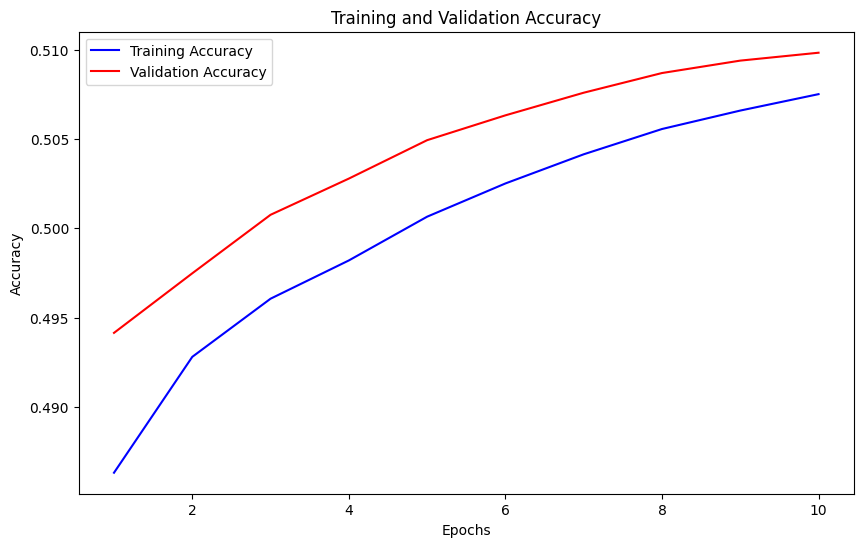

In [66]:
plot_history(model_bidirectional_lstm_glove_history)

In [67]:
predict_print_first_5(model_bidirectional_lstm_glove, X_test,tokens_eng.word_index)

1/1 [==============================] - 2s 2s/step

Actual Sentences:

0 time online an of there work resolution a we do take assured yes the the the the the the the the the the the the the the the the the
1 i an longer of financed several and ischl at of combined directive has monarchys the the the the the the the the the the the the the the the the
2 machine of team to would be equipped last up be have is duties my should and of nl an active of ground the the the the the the the the
3 i an modules turnover for is deny sales hotel is food she the the the the the the the the the the the the the the the the the the
4 hearing but lycia that because every of fooled be grow some of taste and of grave a ceo guests connection planet the the the the the the the the the

Translated Sentences:

0 european this of of of of of and and the the the the the the the the the the the the the the the the the the the the the
1 for been of for for for the the the the the the the the the the the the the the

#### English to German Bidirectional GRU with Glove Embeddings

In [68]:
embeddings_path = "/content/drive/MyDrive/GL - NLP MT/data/glove.6B.100d.txt"
model_bidirectional_gru_glove = glove_bidirectional_GRU_model(tokens_eng, tokens_ger, lang_max_length_eng, lang_max_length_ger, embeddings_path)


Model Definition:
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 30, 100)           3252300   
                                                                 
 bidirectional_1 (Bidirectio  (None, 512)              549888    
 nal)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 repeat_vector_7 (RepeatVect  (None, 30, 512)          0         
 or)                                                             
                                                                 
 gru_1 (GRU)                 (None, 30, 256)           591360    
                                                                 
 dropout_15 (Dropout)        (None,

In [69]:
Patience = 4
Verbose = 1
Epochs = 30
BatchSize = 4
callback = EarlyStopping(monitor='val_loss', patience=Patience, verbose=Verbose)
model_bidirectional_lstm_glove_history = model_bidirectional_gru_glove.fit(X_train,
            y_train.reshape(y_train.shape[0], y_train.shape[1],1),
            validation_data = (X_test, y_test.reshape(y_test.shape[0], y_test.shape[1],1)),
            epochs=Epochs,
            batch_size=BatchSize,
            callbacks=[callback])

Epoch 1/30
5656/5656 [==============================] - 139s 24ms/step - loss: 4.6076 - accuracy: 0.4856 - val_loss: 4.4314 - val_accuracy: 0.4939
Epoch 2/30
5656/5656 [==============================] - 133s 24ms/step - loss: 4.4101 - accuracy: 0.4898 - val_loss: 4.3175 - val_accuracy: 0.4948
Epoch 3/30
5656/5656 [==============================] - 133s 24ms/step - loss: 4.2796 - accuracy: 0.4921 - val_loss: 4.2922 - val_accuracy: 0.4975
Epoch 4/30
5656/5656 [==============================] - 133s 24ms/step - loss: 4.1506 - accuracy: 0.4944 - val_loss: 4.2715 - val_accuracy: 0.4999
Epoch 5/30
5656/5656 [==============================] - 133s 24ms/step - loss: 4.0742 - accuracy: 0.4955 - val_loss: 4.2722 - val_accuracy: 0.5001
Epoch 6/30
5656/5656 [==============================] - 133s 24ms/step - loss: 4.0077 - accuracy: 0.4966 - val_loss: 4.2601 - val_accuracy: 0.5016
Epoch 7/30
5656/5656 [==============================] - 133s 24ms/step - loss: 3.9429 - accuracy: 0.4976 - val_loss: 4

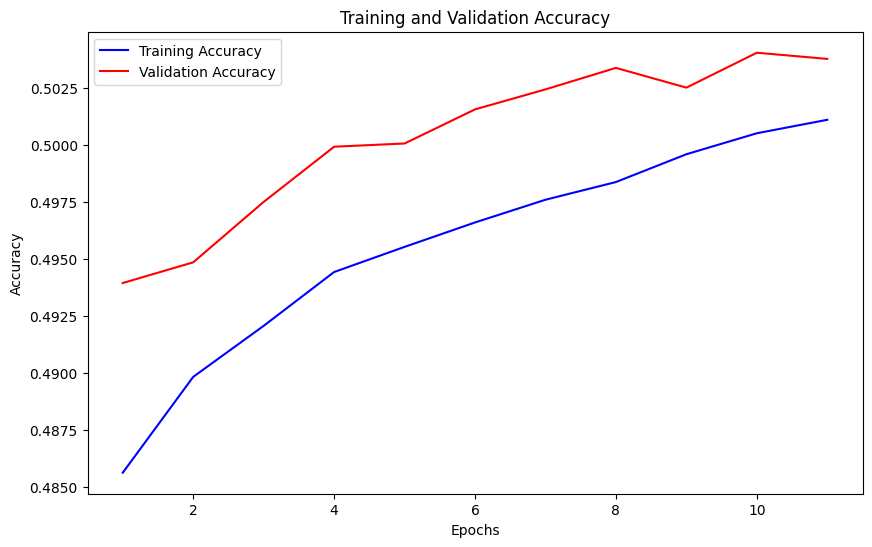

In [70]:
plot_history(model_bidirectional_lstm_glove_history)

In [71]:
predict_print_first_5(model_bidirectional_gru_glove, X_test,tokens_eng.word_index)

1/1 [==============================] - 1s 794ms/step

Actual Sentences:

0 time online an of there work resolution a we do take assured yes the the the the the the the the the the the the the the the the the
1 i an longer of financed several and ischl at of combined directive has monarchys the the the the the the the the the the the the the the the the
2 machine of team to would be equipped last up be have is duties my should and of nl an active of ground the the the the the the the the
3 i an modules turnover for is deny sales hotel is food she the the the the the the the the the the the the the the the the the the
4 hearing but lycia that because every of fooled be grow some of taste and of grave a ceo guests connection planet the the the the the the the the the

Translated Sentences:

0 you this this this of and and and and and the the the the the the the the the the the the the the the the the the the the
1 for for for for it and of for the the the the the the the the the the the t

#### German to English Bidirectional LSTM with Glove Embeddings

In [72]:
embeddings_path = "/content/drive/MyDrive/GL - NLP MT/data/glove.6B.100d.txt"
model_bidirectional_lstm_glove_ger_to_eng = glove_bidirectional_LSTM_model(tokens_ger, tokens_eng, lang_max_length_ger, lang_max_length_eng, embeddings_path)


Model Definition:
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 30, 100)           5664300   
                                                                 
 bidirectional_2 (Bidirectio  (None, 512)              731136    
 nal)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 repeat_vector_8 (RepeatVect  (None, 30, 512)          0         
 or)                                                             
                                                                 
 lstm_13 (LSTM)              (None, 30, 256)           787456    
                                                                 
 dropout_17 (Dropout)        (None,

In [73]:
model_bidirectional_lstm_glove_ger_to_eng_history = model_bidirectional_lstm_glove_ger_to_eng.fit(X_train_2,
            y_train.reshape(y_train_2.shape[0], y_train_2.shape[1],1),
            validation_data = (X_test_2, y_test_2.reshape(y_test_2.shape[0], y_test_2.shape[1],1)),
            epochs=Epochs,
            batch_size=BatchSize,
            callbacks=[callback])

Epoch 1/30
5656/5656 [==============================] - 101s 17ms/step - loss: nan - accuracy: 0.4769 - val_loss: nan - val_accuracy: 0.4437
Epoch 2/30
5656/5656 [==============================] - 96s 17ms/step - loss: nan - accuracy: 0.4770 - val_loss: nan - val_accuracy: 0.4437
Epoch 3/30
5656/5656 [==============================] - 95s 17ms/step - loss: nan - accuracy: 0.4770 - val_loss: nan - val_accuracy: 0.4437
Epoch 4/30
5656/5656 [==============================] - 96s 17ms/step - loss: nan - accuracy: 0.4770 - val_loss: nan - val_accuracy: 0.4437
Epoch 4: early stopping


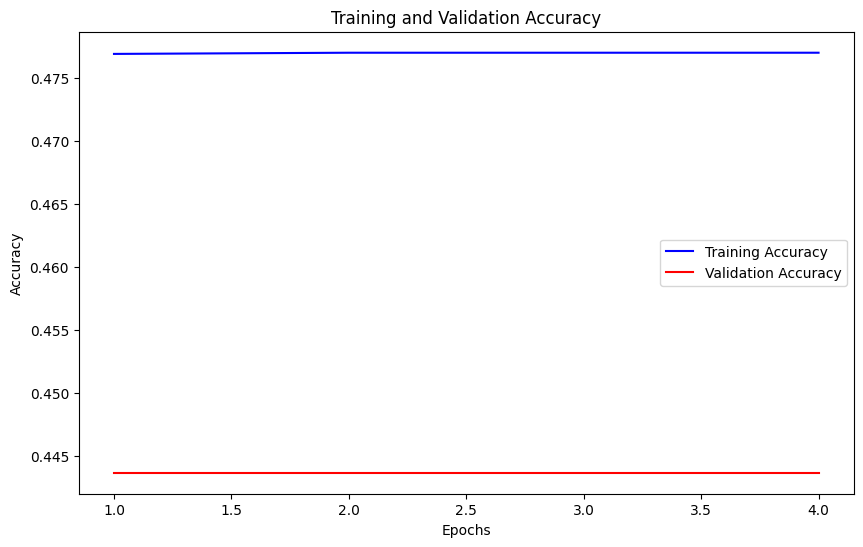

In [74]:
plot_history(model_bidirectional_lstm_glove_ger_to_eng_history)

In [75]:
predict_print_first_5(model_bidirectional_lstm_glove_ger_to_eng, X_test_2,tokens_ger.word_index)

1/1 [==============================] - 1s 981ms/step

Actual Sentences:

0 besonders handelt durch sie ihrer frau zu er hier vergessen kpfe idee ganze die die die die die die die die die die die die die die die die die
1 welche mm der partnerschaften httpwwwmicrosoftcomwindowsdirectx vielleicht ist und britischen tagesordnung erhhen hauptattraktionen die die die die die die die die die die die die die die die die die die
2 teams von der verfahren in muss und franzsische wird von automatisch geist von im allen um einer zuwanderung hier wird nach und ausbau sie dienstleitungen technische durch die die die
3 von zur aufnehmen httpopenbrezovajogosk den des offiziellen zu pltzlich das da behandelt vielen die die die die die die die die die die die die die die die die die
4 wahrsager ffentlich betrag irgendwoher wir finden geholfen teilte arbeitszeiten sie vollstndig bernimmt diese vor unserer kmpfen besteht ist begeben auch ja beitrgt die die die die die die die die

Translated Sentences:



#### German to English Bidirectional GRU Embeddings

In [76]:
model_bidirectional_gru_glove_ger_to_eng = glove_bidirectional_GRU_model(tokens_ger, tokens_eng, lang_max_length_ger, lang_max_length_eng, embeddings_path)


Model Definition:
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 30, 100)           5664300   
                                                                 
 bidirectional_3 (Bidirectio  (None, 512)              549888    
 nal)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 512)               0         
                                                                 
 repeat_vector_9 (RepeatVect  (None, 30, 512)          0         
 or)                                                             
                                                                 
 gru_3 (GRU)                 (None, 30, 256)           591360    
                                                                 
 dropout_19 (Dropout)        (None,

In [77]:
model_bidirectional_gru_glove_ger_to_eng_history = model_bidirectional_gru_glove_ger_to_eng.fit(X_train_2,
            y_train.reshape(y_train_2.shape[0], y_train_2.shape[1],1),
            validation_data = (X_test_2, y_test_2.reshape(y_test_2.shape[0], y_test_2.shape[1],1)),
            epochs=Epochs,
            batch_size=BatchSize,
            callbacks=[callback])

Epoch 1/30
5656/5656 [==============================] - 101s 17ms/step - loss: nan - accuracy: 0.4769 - val_loss: nan - val_accuracy: 0.4437
Epoch 2/30
5656/5656 [==============================] - 94s 17ms/step - loss: nan - accuracy: 0.4770 - val_loss: nan - val_accuracy: 0.4437
Epoch 3/30
5656/5656 [==============================] - 94s 17ms/step - loss: nan - accuracy: 0.4770 - val_loss: nan - val_accuracy: 0.4437
Epoch 4/30
5656/5656 [==============================] - 94s 17ms/step - loss: nan - accuracy: 0.4770 - val_loss: nan - val_accuracy: 0.4437
Epoch 4: early stopping


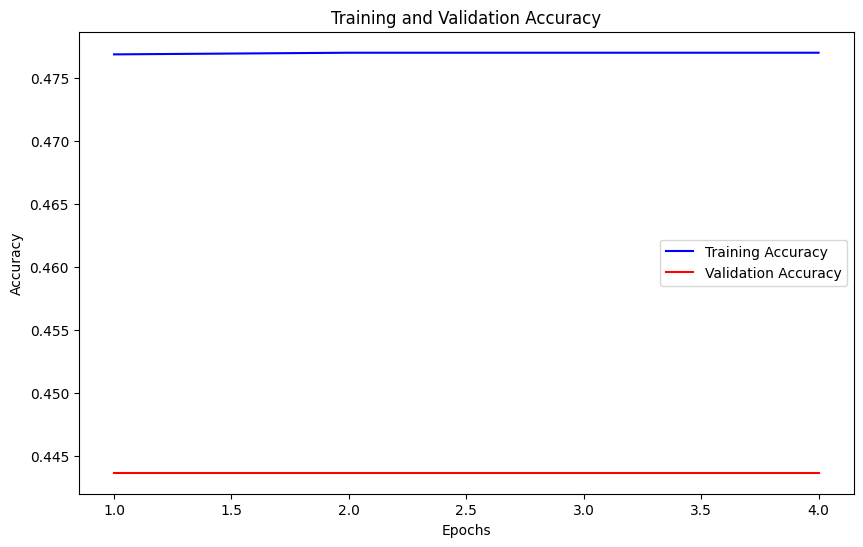

In [78]:
plot_history(model_bidirectional_gru_glove_ger_to_eng_history)

In [79]:
predict_print_first_5(model_bidirectional_gru_glove_ger_to_eng, X_test_2,tokens_ger.word_index)

1/1 [==============================] - 1s 858ms/step

Actual Sentences:

0 besonders handelt durch sie ihrer frau zu er hier vergessen kpfe idee ganze die die die die die die die die die die die die die die die die die
1 welche mm der partnerschaften httpwwwmicrosoftcomwindowsdirectx vielleicht ist und britischen tagesordnung erhhen hauptattraktionen die die die die die die die die die die die die die die die die die die
2 teams von der verfahren in muss und franzsische wird von automatisch geist von im allen um einer zuwanderung hier wird nach und ausbau sie dienstleitungen technische durch die die die
3 von zur aufnehmen httpopenbrezovajogosk den des offiziellen zu pltzlich das da behandelt vielen die die die die die die die die die die die die die die die die die
4 wahrsager ffentlich betrag irgendwoher wir finden geholfen teilte arbeitszeiten sie vollstndig bernimmt diese vor unserer kmpfen besteht ist begeben auch ja beitrgt die die die die die die die die

Translated Sentences:



### Step  3:  Design,  train  and  test  Encoder-Decoder  RNN  &  LSTM  model

In [80]:
df = new_df_final

# Lowercase all characters
df['english']=df['english'].apply(lambda x: x.lower())
df['german']=df['german'].apply(lambda x: x.lower())

# Remove quotes
df['english']=df['english'].apply(lambda x: re.sub("'", '', x))
df['german']=df['german'].apply(lambda x: re.sub("'", '', x))

exclude = set(string.punctuation) # Set of all special characters

# Remove all the special characters
df['english']=df['english'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
df['german']=df['german'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

# Remove all numbers from text
remove_digits = str.maketrans('', '', digits)
df['english']=df['english'].apply(lambda x: x.translate(remove_digits))
df['german']=df['german'].apply(lambda x: x.translate(remove_digits))


# Remove extra spaces
df['english']=df['english'].apply(lambda x: x.strip())
df['german']=df['german'].apply(lambda x: x.strip())
df['english']=df['english'].apply(lambda x: re.sub(" +", " ", x))
df['german']=df['german'].apply(lambda x: re.sub(" +", " ", x))

# Add start and end tokens to target sequences
df['german'] = df['german'].apply(lambda x : 'START_ '+ x + ' _END')

<ipython-input-80-68e15a816f37>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['english']=df['english'].apply(lambda x: x.lower())
<ipython-input-80-68e15a816f37>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['german']=df['german'].apply(lambda x: x.lower())
<ipython-input-80-68e15a816f37>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [81]:
all_eng_words=set()
for eng in df['english']:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)

all_german_words=set()
for ger in df['german']:
    for word in ger.split():
        if word not in all_german_words:
            all_german_words.add(word)

df['length_eng']=df['english'].apply(lambda x:len(x.split(" ")))
df['length_ger']=df['german'].apply(lambda x:len(x.split(" ")))

df=df[df['length_eng']<=20]
df=df[df['length_ger']<=20]

print("maximum length of German Sentence ",max(df['length_ger']))
print("maximum length of English Sentence ",max(df['length_eng']))

max_length_src=max(df['length_ger'])+1
max_length_tar=max(df['length_eng'])+1

maximum length of German Sentence  20
maximum length of English Sentence  20


<ipython-input-81-a50317355b8b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length_eng']=df['english'].apply(lambda x:len(x.split(" ")))
<ipython-input-81-a50317355b8b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length_ger']=df['german'].apply(lambda x:len(x.split(" ")))


In [82]:
from sklearn.utils import shuffle

input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_german_words))
num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_german_words)
num_encoder_tokens, num_decoder_tokens

num_encoder_tokens += 1 #for zero padding
num_decoder_tokens += 1 #for zero padding

input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

df = shuffle(df)
print(df.head())

                                                   english  \
1300517  heidelbergs very mild winters early spring sea...   
1706518          a watchful eye has to be kept on spending   
435752   the project is still in its infancy and is ask...   
1643176  we are member of logis de belgique since with ...   
1784947  the trendy labeltshirt by dildo royal fits per...   

                                                    german  english_len  \
1300517  START_ das zimmer wird mit frhstck kosten fr b...           15   
1706518  START_ die administrative effizienz der mittel...            9   
435752   START_ das projekt ist immer noch im anfangsst...           15   
1643176  START_ wir sind mitglied bei logis von belgien...           12   
1784947  START_ das trendige labeltshirt von dildo roya...           12   

         german_len english_lang german_lang  length_eng  length_ger  
1300517          16           en          de          15          16  
1706518           8           en  

In [83]:
X, y = df['english'], df['german']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
X_train.shape, X_test.shape

latent_dim=300

def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for jr in range(0, len(X), batch_size):


            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')

            for i, (input_text, target_text) in enumerate(zip(X[jr:jr+batch_size], y[jr:jr+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        # Offset by one timestep
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

In [84]:
# Encoder
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens+1, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens+1, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [85]:
# Encoder - Decoder Model

model_enc_dec = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model_enc_dec.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

print(model_enc_dec.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, None, 300)    9744600     ['input_1[0][0]']                
                                                                                                  
 embedding_11 (Embedding)       (None, None, 300)    16977300    ['input_2[0][0]']                
                                                                                              

In [87]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 100

model_enc_dec.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,
                    validation_data = generate_batch(X_test, y_test, batch_size = batch_size),
                    validation_steps = val_samples//batch_size)

<ipython-input-87-2d40bd7464d1>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_enc_dec.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),


Epoch 1/100
105/105 [==============================] - ETA: 0s - loss: 7.4335 - accuracy: 0.0994

105/105 [==============================] - 70s 663ms/step - loss: 7.4335 - accuracy: 0.0994
Epoch 2/100
105/105 [==============================] - 70s 662ms/step - loss: 7.3727 - accuracy: 0.1005
Epoch 3/100
105/105 [==============================] - 70s 662ms/step - loss: 7.3408 - accuracy: 0.1008
Epoch 4/100
105/105 [==============================] - 70s 662ms/step - loss: 7.3188 - accuracy: 0.1009
Epoch 5/100
105/105 [==============================] - 70s 663ms/step - loss: 7.3031 - accuracy: 0.1010
Epoch 6/100
105/105 [==============================] - 69s 660ms/step - loss: 7.2864 - accuracy: 0.1010
Epoch 7/100
105/105 [==============================] - 69s 661ms/step - loss: 7.2739 - accuracy: 0.1012
Epoch 8/100
105/105 [==============================] - 70s 663ms/step - loss: 7.2625 - accuracy: 0.1018
Epoch 9/100
105/105 [==============================] - 69s 661ms/step - loss: 7.2512 - accuracy: 0.1021
Epoch 10/100
105/105 [==============================] - 69s 658ms/step - los

In [88]:
# Encode the input sequence to get the "thought vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) # Get the embeddings of the decoder sequence

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) # A dense softmax layer to generate prob dist. over the target vocabulary

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['START_']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [89]:
train_gen = generate_batch(X_train, y_train, batch_size = 1)
k=-1

In [90]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual German Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

1/1 [==============================] - 0s 23ms/step
Input English sentence: you can see that
Actual German Translation:  das sehen sie 
Predicted German Translation:  sie haben uns 


In [91]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual German Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

1/1 [==============================] - 0s 26ms/step
Input English sentence: we do our best to provide you a comfortable stay in a friendly atmosphere
Actual German Translation:  das personal bemht sich ihnen einen komfortablen aufenthalt in einer freundlichen atmosphre zu bieten 
Predicted German Translation:  wir bieten uns auf der webseite der kunden und


In [93]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model_enc_dec, open(filename, 'wb'))

In [94]:
# load the model from disk

loaded_model = pickle.load(open(filename, 'rb'))
print(type(loaded_model))
loaded_model.summary()

<class 'keras.engine.functional.Functional'>
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, None, 300)    9744600     ['input_1[0][0]']                
                                                                                                  
 embedding_11 (Embedding)       (None, None, 300)    16977300    ['input_2[0][0]']                
                                                 